# K means clustering step by step

In [1]:
import pandas as pd
import numpy as np
import altair as alt

### **Loading Data**

In [2]:
df = pd.read_csv("/Users/megankelly/ASDA/6.3.3_spotify_5000_songs.csv")

In [3]:
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [5]:
# check for missing values
df.isnull().sum()

name                                                                                                                                                                                 0
artist                                                                                                                                                                               0
danceability                                                                                                                                                                         0
energy                                                                                                                                                                               0
key                                                                                                                                                                                  0
loudness                                                                             

In [7]:
df.columns

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

### **Step 1: Select and Prepare Numerical Features**
For k-means clustering, we need to select only the numerical features that are relevant for clustering. Here we are removing the feature "quality". Don't forget to remove duplicates and missing values

In [8]:
clustering_features = [
       'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'duration_ms ', 'time_signature '
]

# Create a dataframe with only these features
X = df[clustering_features].copy()
X = X.dropna(axis=0)

### **Step 2: Normalize the Features**
K-means clustering is sensitive to the scale of features. Since our features have different ranges (e.g., duration_ms is in thousands while danceability is 0-1), we need to standardize them so they all contribute equally to the clustering.

In [9]:
# Calculate min and max for each feature

"""# Calculate mean and standard deviation for each feature
means = X.mean()
stds = X.std()

# Standardize the features (z-score normalization)
# Formula: (value - mean) / std
X_normalized = (X - means) / stds"""

mins = X.min()
maxs = X.max()

# Min-Max normalization
# Formula: (value - min) / (max - min)
X_normalized = ((X - mins) / (maxs - mins))*9+1

# Agglomerative Hierarchical Clustering with Scikit-Learn and Scipy

### **Step 1: Getting the Linkage Matrix**

### **Linkage Methods Explained**
- **Ward**: Minimizes within-cluster variance (most commonly used, only works with euclidean)
- **Complete**: Maximum distance between clusters (farthest points)
- **Average**: Average distance between all pairs of points in clusters
- **Single**: Minimum distance between clusters (nearest points)

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create linkage matrix using scipy (needed for dendrogram)
# We need to recalculate because sklearn doesn't store the full linkage matrix
linkage_matrix = linkage(
    X_normalized,
    method='ward',  # Same linkage as sklearn
    metric='euclidean'  # Same metric as sklearn
)

# The linkage matrix has shape (n_samples-1, 4) where each row represents a merge
# Columns: [cluster1, cluster2, distance, number_of_original_observations]
linkage_matrix_df = pd.DataFrame(
    linkage_matrix,
    columns=['cluster_1', 'cluster_2', 'distance', 'n_observations']
)

# Display first 10 merges
linkage_matrix_df.head(10)

,cluster_1,cluster_2,distance,n_observations
0,0.0,174.0,0.0,2.0
1,1198.0,3164.0,0.0,2.0
2,800.0,2587.0,0.0,2.0
3,10.0,2494.0,0.0,2.0
4,866.0,2446.0,0.0,2.0
5,1680.0,2921.0,0.0,2.0
6,760.0,1382.0,0.0,2.0
7,767.0,1563.0,0.0,2.0
8,494.0,1306.0,0.0,2.0
9,1687.0,2646.0,0.0,2.0


In [11]:
len(X_normalized), len(linkage_matrix_df)

(5235, 5234)

### **Step 2: Visualizing Dendogram**

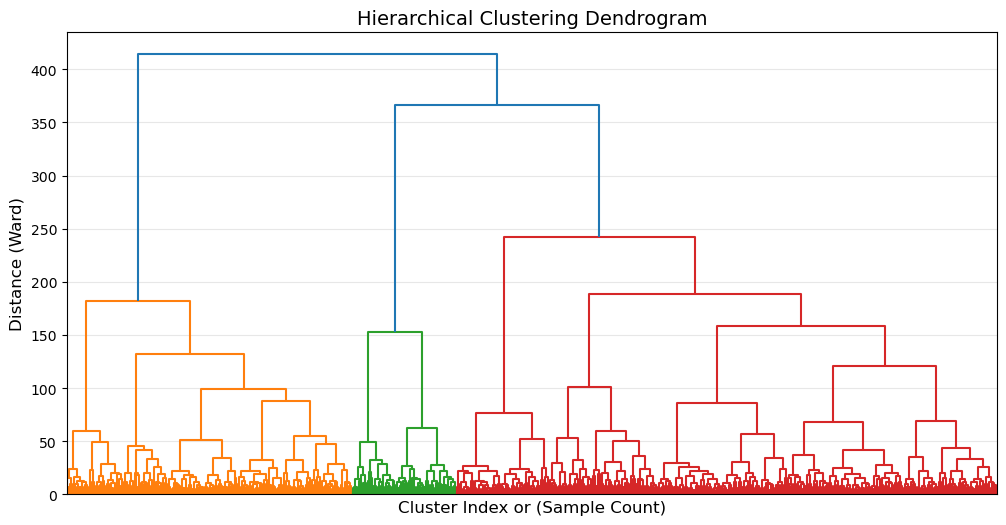

In [12]:
import matplotlib.pyplot as plt

# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram_plot = dendrogram(
    linkage_matrix,
    #truncate_mode='lastp',  # Show only the last p merged clusters
    #p=20,  # Number of clusters to show
    #show_leaf_counts=True,  # Show number of samples in each cluster
    #leaf_font_size=10,
    show_contracted=True,
    no_labels=True# Show height of contracted branches
)

plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Cluster Index or (Sample Count)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.gca();

### **Step 3: Cutting the dendrogram**

In [45]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at height 200
# This assigns cluster labels based on the specified height
clusters_at_height_50 = fcluster(
    linkage_matrix,
    t=200,  # The threshold/height where to cut
    criterion='distance'  # Cut based on distance (height)
)

# Create a dataframe with the cluster assignments
X_clusters_height_50 = X_normalized.copy()
X_clusters_height_50['cluster'] = clusters_at_height_50

# Display first 10 rows
X_clusters_height_50.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,7.124095,3.3310,10.000000,7.875077,1.0,1.691176,7.271084,1.000536,9.890578,3.795939,5.642198,1.531605,8.2,1
1,7.905895,4.5910,2.636364,7.947703,10.0,1.339216,2.960843,1.000017,1.975684,7.331980,6.258895,1.378523,8.2,4
2,8.920372,7.5700,2.636364,8.182159,10.0,4.401961,5.093373,1.000579,2.130699,9.269036,4.940754,1.284313,8.2,4
3,7.561531,1.4518,4.272727,7.145300,10.0,1.461765,8.942771,1.000370,4.519757,5.787817,5.491883,1.365105,8.2,4
4,7.058945,2.0710,5.909091,6.897053,10.0,1.372549,9.277108,1.003134,1.948328,4.673096,6.086541,1.573160,8.2,4
5,5.337125,2.3140,3.454545,7.235532,10.0,1.636275,9.412651,2.407107,1.975684,4.864975,7.009463,1.515366,8.2,4
6,7.282316,2.8630,10.000000,7.775456,1.0,1.534314,9.701807,4.782741,2.021277,7.249746,4.933731,1.267469,8.2,1
7,5.690796,7.5970,6.727273,8.230283,10.0,4.813725,7.289157,1.000513,7.136778,9.095431,5.061335,1.658996,8.2,4
8,7.459152,5.9140,9.181818,8.122885,10.0,1.392157,4.596386,1.694416,2.395137,6.856853,8.151213,1.407452,8.2,4
9,7.273009,8.7760,1.818182,8.633612,10.0,1.374510,6.792169,4.271066,2.267477,5.897462,5.205594,1.352986,8.2,4


### **4. Running PCA**

In [46]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame with PCA results
X_pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)

# Display variance explained
variance_explained = pca.explained_variance_ratio_
print(f"""
**PCA Results:**
- PC1 explains {variance_explained[0]:.2%} of variance
- PC2 explains {variance_explained[1]:.2%} of variance
- Total variance explained: {variance_explained.sum():.2%}
""")


**PCA Results:**
- PC1 explains 27.95% of variance
- PC2 explains 26.17% of variance
- Total variance explained: 54.11%



### **Step 5: Visualize with PCA**

In [47]:
# Visualize the clusters in PCA space
# Create a DataFrame for plotting
import altair as alt
alt.data_transformers.enable("vegafusion")


plot_df_height_50 = X_pca_df.copy()
plot_df_height_50['cluster'] = clusters_at_height_50.astype(str)

chart_height_50 = alt.Chart(plot_df_height_50).mark_circle(size=30, opacity=0.6).encode(
    x=alt.X('PC1:Q', title=f'PC1 ({variance_explained[0]:.1%} variance)'),
    y=alt.Y('PC2:Q', title=f'PC2 ({variance_explained[1]:.1%} variance)'),
    color=alt.Color('cluster:N', title='Cluster', scale=alt.Scale(scheme='category10')),
    tooltip=['PC1', 'PC2', 'cluster']
).properties(
    title='Hierarchical Clustering - Cut at Height 200',
    width=600,
    height=500
)

chart_height_50

alt.Chart(...)

In [48]:
# Join dataframes to add cluster labels to original data
df_with_clusters = df.join(
    X_clusters_height_50[['cluster']],
    how='inner'
)

df_with_clusters.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,1
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,4
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,4
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,4
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,4


### **Step 6: Create Spotify Playlists**

In [49]:
# Get sample songs of each cluster for playlist creation
sample_songs_per_cluster = df_with_clusters.groupby('cluster').apply(
    lambda x: x.sample(n=5, random_state=42)  # Sample 5 songs per cluster
).reset_index(drop=True)

/var/folders/x_/zccbsk657rb51hx1tc0t1ss80000gn/T/ipykernel_81072/2837145126.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_songs_per_cluster = df_with_clusters.groupby('cluster').apply(
